Datos de ruidos de automóviles en Nueva York 2019-2023

In [46]:
# Librerías
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# para eliminar warning en python
import warnings
warnings.simplefilter('ignore')

from geopy.geocoders import ArcGIS
import folium


In [47]:
# Assumiendo que el archivo está en la carpeta, 2019
# Cambiar al directorio con el archivo
file_path_01 = "C:/Users/56988/Desktop/NYdrive/archivosExtNY/ruido2019autos.csv"
os.chdir("C:/Users/56988/Desktop/NYdrive/archivosExtNY/")

In [48]:
# Año 2020
file_path_02 = "C:/Users/56988/Desktop/NYdrive/archivosExtNY/ruido2020autos.csv"
os.chdir("C:/Users/56988/Desktop/NYdrive/archivosExtNY/")

In [49]:
# Año 2021
file_path_03 = "C:/Users/56988/Desktop/NYdrive/archivosExtNY/ruido2021autos.csv"
os.chdir("C:/Users/56988/Desktop/NYdrive/archivosExtNY/")

In [50]:
# Año 2022
file_path_04 = "C:/Users/56988/Desktop/NYdrive/archivosExtNY/ruido2022autos.csv"
os.chdir("C:/Users/56988/Desktop/NYdrive/archivosExtNY/")

In [51]:
# Año 2023
file_path_05 = "C:/Users/56988/Desktop/NYdrive/archivosExtNY/ruido2023autos.csv"
os.chdir("C:/Users/56988/Desktop/NYdrive/archivosExtNY/")

In [52]:
# Año 2024
file_path_06 = "C:/Users/56988/Desktop/NYdrive/archivosExtNY/ruido2024autos.csv"
os.chdir("C:/Users/56988/Desktop/NYdrive/archivosExtNY/")

In [53]:
# Dataframe ruidos 2019
df_ruidos_2019 = pd.read_csv(file_path_01)

In [54]:
# Dataframe ruidos 2020
df_ruidos_2020 = pd.read_csv(file_path_02)

In [55]:
# Dataframe ruidos 2021
df_ruidos_2021 = pd.read_csv(file_path_03)

In [56]:
# Dataframe ruidos 2022
df_ruidos_2022 = pd.read_csv(file_path_04)

In [57]:
# Dataframe ruidos 2023
df_ruidos_2023 = pd.read_csv(file_path_05)

In [58]:
# Dataframe ruidos 2024
df_ruidos_2024 = pd.read_csv(file_path_06)

In [59]:
# Ver dataframe 2019
df_ruidos_2019.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,fecha,hora,agno,mes,dia
0,39475884,06/15/2018 11:10:24 PM,2019-07-29 12:14:57,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Music,Street/Sidewalk,NaN,202 STREET,...,NaN,NaN,NaN,NaN,NaN,2019-07-29,12:14:57,2019.0,7.0,29.0
1,39480713,06/16/2018 11:09:43 PM,2019-07-29 12:14:58,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Music,Street/Sidewalk,NaN,GUIDER AVENUE,...,NaN,NaN,NaN,NaN,NaN,2019-07-29,12:14:58,2019.0,7.0,29.0


In [60]:
# Cuántos nulos hay en latitud
df_ruidos_2019["Latitude"].isnull().sum()

1295

In [61]:
# Cuántos nulos hay en longitud
df_ruidos_2019["Longitude"].isnull().sum()

1295

In [62]:
# Reemplazar NaN con ceros en las columnas longitud y latitud
df_ruidos_2019[["Latitude", "Longitude"]] = df_ruidos_2019[["Latitude", "Longitude"]].fillna(0)

In [63]:
df_ruidos_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43063 entries, 0 to 43062
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unique Key                      43063 non-null  int64  
 1   Created Date                    43063 non-null  object 
 2   Closed Date                     43063 non-null  object 
 3   Agency                          43063 non-null  object 
 4   Agency Name                     43063 non-null  object 
 5   Complaint Type                  43063 non-null  object 
 6   Descriptor                      43063 non-null  object 
 7   Location Type                   39730 non-null  object 
 8   Incident Zip                    42987 non-null  float64
 9   Incident Address                39410 non-null  object 
 10  Street Name                     39410 non-null  object 
 11  Cross Street 1                  39944 non-null  object 
 12  Cross Street 2                  

In [64]:
# Convertir la columna de mes y día a tipo int
df_ruidos_2019["agno"] = df_ruidos_2019["agno"].astype(int)
df_ruidos_2019["mes"] = df_ruidos_2019["mes"].astype(int)
df_ruidos_2019["dia"] = df_ruidos_2019["dia"].astype(int)

In [65]:
# Pasar a formato datetime
df_ruidos_2019.loc[:, "hora"] = pd.to_datetime(df_ruidos_2019["hora"])

In [66]:
# Crea una nueva columna 'hora_exacta' extrayendo la hora de la columna 'hora'
df_ruidos_2019.loc[:, "hora_exacta"] = df_ruidos_2019["hora"].apply(lambda x: x.hour)

In [67]:
# Escoger tipo de conflicto: ruidos de automóviles
df_ruidos_2019["Complaint Type"].unique()

array(['Noise - Vehicle'], dtype=object)

In [68]:
# Agrupar por mes y conflicto
grouped_data_mes = df_ruidos_2019.groupby("Complaint Type")["mes"].sum()

In [69]:
# Agrupar por dia y conflicto
grouped_data_dia = df_ruidos_2019.groupby("Complaint Type")["dia"].sum()

In [70]:
grouped_data_hora_ex = df_ruidos_2019.groupby("Complaint Type")["hora_exacta"].sum()

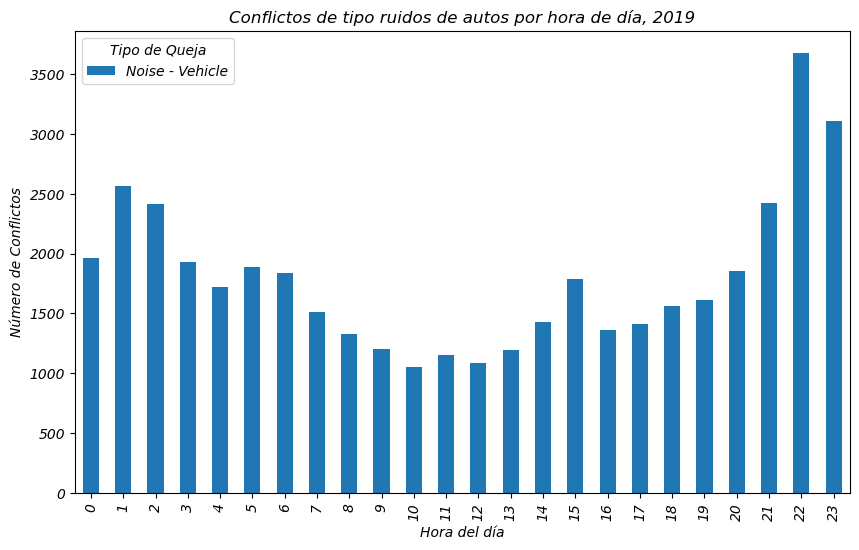

In [71]:
# Agrupa por hora del día
grouped_data = df_ruidos_2019.groupby(["hora_exacta", "Complaint Type"]).size().unstack()

# Crea un gráfico de barras
grouped_data.plot(kind='bar', figsize=(10, 6))
plt.xlabel("Hora del día")
plt.ylabel("Número de Conflictos")
plt.title("Conflictos de tipo ruidos de autos por hora de día, 2019")
plt.legend(title="Tipo de Queja")
plt.show()

In [72]:
# Mapa de ubicación de conflictos:
nom = ArcGIS()

In [73]:
# Código geoubicación de Nueva York
NY = nom.geocode("New York")

In [74]:
NY.latitude

40.7130466

In [75]:
NY.longitude

-74.0072301

In [76]:
# Mapa en folium, se ve NY
map = folium.Map(location = [40.7130466, -74.0072301], zoom_start = 20)

In [77]:
# Agregar los datos:
for index, row in df_ruidos_2019.iterrows():
    folium.Marker(location=[row["Latitude"], row["Longitude"]], popup="Ubicación").add_to(map)

In [78]:
# Guardar el mapa como un archivo HTML   58 seg      No logré el mapa buhhh
# map.save("mi_mapa.html")

In [79]:
# Guardar df de ruidos 2019
# df_ruidos_2019.to_csv("df_ruidos_2019.csv")

In [80]:
# Dataframe ruidos 2023
df_ruidos_2023.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,fecha,hora,agno,mes,dia
0,56288552,12/19/2022 01:36:33 AM,2023-05-05 11:40:14,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Music,Street/Sidewalk,11225.0,2116 BEEKMAN PLACE,...,NaN,NaN,40.660007,-73.960872,"(40.66000659902708, -73.96087182826301)",2023-05-05,11:40:14,2023.0,5.0,5.0
1,56412499,01/01/2023 07:51:18 PM,2023-01-01 20:19:51,NYPD,New York City Police Department,Noise - Vehicle,Engine Idling,Street/Sidewalk,11420.0,124-15 OLD SOUTH ROAD,...,NaN,NaN,40.664786,-73.816622,"(40.66478573741414, -73.81662208738771)",2023-01-01,20:19:51,2023.0,1.0,1.0


In [81]:
# Convertir la columna de mes y día a tipo int
df_ruidos_2023["agno"] = df_ruidos_2023["agno"].astype(int)
df_ruidos_2023["mes"] = df_ruidos_2023["mes"].astype(int)
df_ruidos_2023["dia"] = df_ruidos_2023["dia"].astype(int)

In [82]:
# Pasar a formato datetime
df_ruidos_2023.loc[:, "hora"] = pd.to_datetime(df_ruidos_2023["hora"])

In [83]:
# Crea una nueva columna 'hora_exacta' extrayendo la hora de la columna 'hora'
df_ruidos_2023.loc[:, "hora_exacta"] = df_ruidos_2023["hora"].apply(lambda x: x.hour)

In [84]:
df_ruidos_2023.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Segment,Latitude,Longitude,Location,fecha,hora,agno,mes,dia,hora_exacta
0,56288552,12/19/2022 01:36:33 AM,2023-05-05 11:40:14,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Music,Street/Sidewalk,11225.0,2116 BEEKMAN PLACE,...,NaN,40.660007,-73.960872,"(40.66000659902708, -73.96087182826301)",2023-05-05,2024-07-02 11:40:14,2023,5,5,11
1,56412499,01/01/2023 07:51:18 PM,2023-01-01 20:19:51,NYPD,New York City Police Department,Noise - Vehicle,Engine Idling,Street/Sidewalk,11420.0,124-15 OLD SOUTH ROAD,...,NaN,40.664786,-73.816622,"(40.66478573741414, -73.81662208738771)",2023-01-01,2024-07-02 20:19:51,2023,1,1,20


In [85]:
# Guardar df de ruidos 2024
#df_ruidos_2023.to_csv("df_ruidos_2023.csv")